<a href="https://colab.research.google.com/github/hernandemonteiro/data_science_do_zero/blob/main/ml_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

import seaborn as sns
import pandas as pd
import numpy as np

In [230]:
# features
# longo?
# perna curta?
# faz auau

porco1 = [0, 1, 0]
porco2 = [0, 1, 1]
porco3 = [1, 1, 0]

cachorro1 = [0, 1, 1]
cachorro2 = [1, 0, 1]
cachorro3 = [1, 1, 1]

In [231]:
treino_x = [porco1, porco2, porco3, cachorro1, cachorro2, cachorro3]
treino_y = [1, 1, 1, 0, 0, 0] # labels / etiqueta

In [232]:
model = LinearSVC()
model.fit(treino_x, treino_y)

LinearSVC()

In [233]:
animal_misterioso = [1, 1, 1]

model.predict([animal_misterioso])

array([0])

In [234]:
misterio1 = [1, 1, 1]
misterio2 = [1, 1, 0]
misterio3 = [0, 1, 1]

In [235]:
teste_x = [misterio1, misterio2, misterio3]
teste_y = [0, 1, 1]

In [236]:
previsoes = model.predict(teste_x)
previsoes

array([0, 1, 0])

In [237]:
corretos = (previsoes == teste_y).sum()
total = len(teste_x)
taxa_de_acerto = round((corretos / total) * 100)
print(f"Taxa de acerto: {taxa_de_acerto}%")

Taxa de acerto: 67%


In [238]:
taxa_de_acerto = round(accuracy_score(teste_y, previsoes) * 100)
print(f"Taxa de acerto: {taxa_de_acerto}%")

Taxa de acerto: 67%


# Outro estudo



In [239]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv"
dados = pd.read_csv(uri)
dados.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [240]:
X = dados[["home", "how_it_works", "contact"]]
X

,home,how_it_works,contact
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
94,0,0,1
95,1,1,1
96,0,0,1
97,0,1,0


In [241]:
y = dados["bought"]
y

0     0
1     0
2     0
3     0
4     0
     ..
94    0
95    1
96    0
97    0
98    0
Name: bought, Length: 99, dtype: int64

In [242]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [243]:
# testando distribuição entre opções
y_train.value_counts()

bought
0    46
1    23
Name: count, dtype: int64

In [244]:
model = LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [245]:
previsoes = model.predict(X_test)
acuracia = accuracy_score(y_test, previsoes) * 100
print("A acurácia [sklearn] foi %.2f%%" % acuracia)

A acurácia [sklearn] foi 96.67%


In [246]:
# ou podemos usar algo do próprio modelo
acuracia2 = model.score(X_test, y_test) * 100
print("A acurácia [padrão] foi %.2f%%" % acuracia2)

A acurácia [padrão] foi 96.67%


# Terceiro teste

In [247]:
uri= 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
dados = pd.read_csv(uri)

In [248]:
dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [249]:
dados["unfinished"].value_counts()

unfinished
0    1134
1    1023
Name: count, dtype: int64

In [250]:
dados.rename(columns={
    "expected_hours": "horas_esperadas",
    "price": "preco",
    "unfinished": "nao_finalizado"
}, inplace=True)

In [251]:
dados["finalizado"] = dados["nao_finalizado"].map({ 0:1,
                              1:0 })

In [252]:
dados

,nao_finalizado,horas_esperadas,preco,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0
...,...,...,...,...
2152,0,80,7518,1
2153,1,52,1332,0
2154,0,40,473,1
2155,0,75,5324,1


<Axes: xlabel='horas_esperadas', ylabel='preco'>

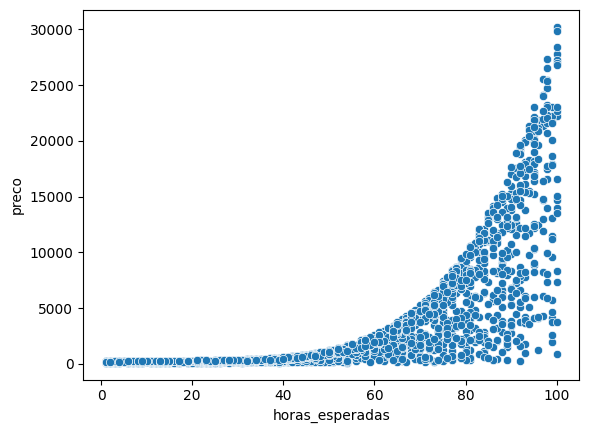

In [253]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

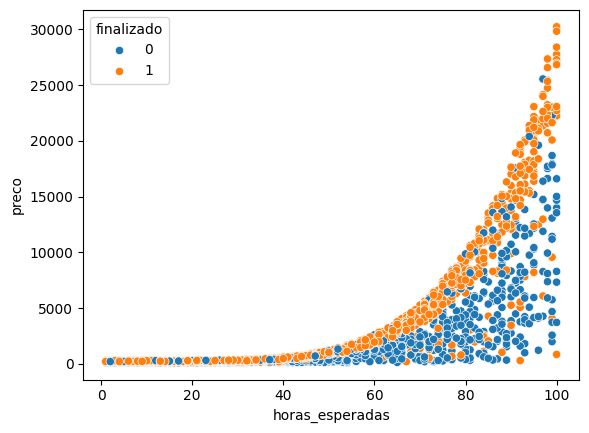

In [254]:
sns.scatterplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado")

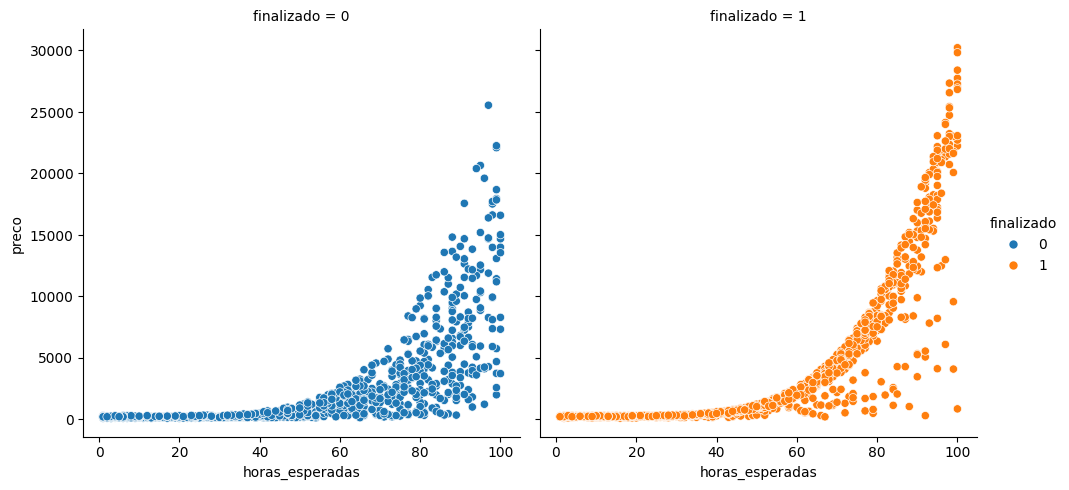

In [255]:
sns.relplot(x="horas_esperadas", y="preco", data=dados, hue="finalizado", col="finalizado")

In [256]:
X = dados[["horas_esperadas", "preco"]]
y = dados["finalizado"]

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [258]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [259]:
print(f"Treinaremos com {len(y_train)} e testaremos com {len(y_test)}")

Treinaremos com 1617 e testaremos com 540


In [260]:
previsoes = model.predict(X_test)
acuracia = accuracy_score(y_test, previsoes) * 100
print("Acurácia: %.2f%%" % acuracia)

Acurácia: 47.41%


In [261]:
previsoes_de_base = np.ones(540, dtype="int64")
acuracia = accuracy_score(y_test, previsoes_de_base) * 100
print("Acurácia do algoritmo de baseline: %.2f%%" % acuracia)

Acurácia do algoritmo de baseline: 52.59%


<Axes: xlabel='horas_esperadas', ylabel='preco'>

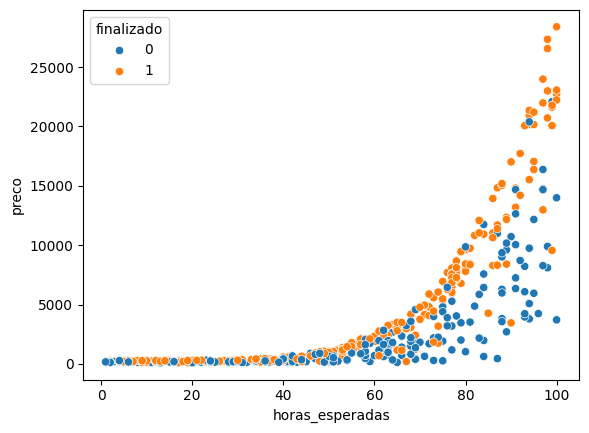

In [262]:
sns.scatterplot(x="horas_esperadas", y="preco", data=X_test, hue=y_test)

In [263]:
x_min = X_test["horas_esperadas"].min()
x_max = X_test["horas_esperadas"].max()
y_min = X_test["preco"].min()
y_max = X_test["preco"].max()

print(x_min, x_max, y_min, y_max)

1 100 100 28398


In [264]:
pixels = 100

eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [265]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [266]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

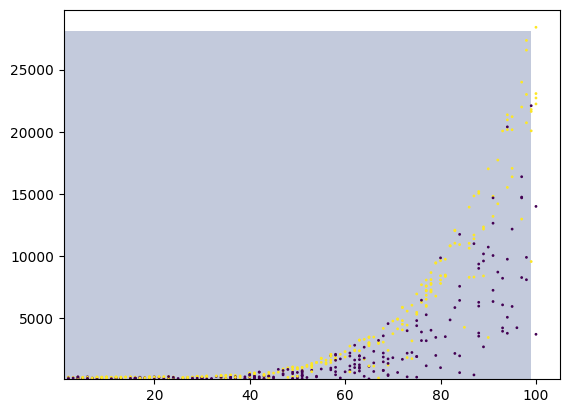

In [268]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X_test["horas_esperadas"], X_test["preco"], c=y_test, s=1)

## melhorando o modelo para nossos dados que não são lineares